# Models v5 Onward

Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
pd.set_option('display.max_columns', None)
np.random.seed(1)

%matplotlib inline

Reading csvs

In [2]:
sub_df = pd.read_csv('data/submission_format.csv')
test_vals = pd.read_csv('data/test_set_values.csv')
train_labels = pd.read_csv('data/training_set_labels.csv')
train_vals = pd.read_csv('data/training_set_values.csv')
train_df = pd.read_csv('data/clean_train.csv')

### Viewing head, info, and some value_counts

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55973 entries, 0 to 55972
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         55973 non-null  int64  
 1   id                 55973 non-null  int64  
 2   amount_tsh         55973 non-null  float64
 3   date_recorded      55973 non-null  object 
 4   gps_height         55973 non-null  int64  
 5   longitude          55973 non-null  float64
 6   latitude           55973 non-null  float64
 7   wpt_name           55973 non-null  object 
 8   basin              55973 non-null  object 
 9   subvillage         55973 non-null  object 
 10  region             55973 non-null  object 
 11  region_code        55973 non-null  int64  
 12  district_code      55973 non-null  int64  
 13  lga                55973 non-null  object 
 14  ward               55973 non-null  object 
 15  population         55973 non-null  int64  
 16  permit             559

# ONE HOT ENCONDING

In [4]:
#What are the categorical columns
categorical = ['basin', 'region', 'lga', 'extraction_type', 
               'management', 'payment_type', 'water_quality', 'quantity', 'source_type', 'source_class', 
               'waterpoint_type']

#What are the continous columns
continuous = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'population', 
              'permit', 'construction_year', 'status_group']

#What is the target group
target = 'status_group'

In [5]:
cat_df = train_df[categorical]
cont_df = train_df[continuous]

In [6]:
#num of unique values in 
c = 0
for column in cat_df:
    print(column,":",len(train_df[column].unique()))
    c+= len(train_df[column].unique())

basin : 9
region : 21
lga : 121
extraction_type : 18
management : 12
payment_type : 7
water_quality : 8
quantity : 5
source_type : 7
source_class : 3
waterpoint_type : 7


In [7]:
#instantiate OHE
ohe = OneHotEncoder()

#fit_transform
X_cat = ohe.fit_transform(cat_df).toarray()

X_cat = pd.DataFrame(X_cat, columns = ohe.get_feature_names_out(categorical))

In [8]:
X_cat

,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,lga_Arusha Rural,lga_Babati,lga_Bagamoyo,lga_Bahi,lga_Bariadi,lga_Biharamulo,lga_Bukoba Rural,lga_Bukoba Urban,lga_Bukombe,lga_Bunda,lga_Chamwino,lga_Chato,lga_Chunya,lga_Dodoma Urban,lga_Geita,lga_Hai,lga_Hanang,lga_Handeni,lga_Igunga,lga_Ilala,lga_Ileje,lga_Ilemela,lga_Iramba,lga_Iringa Rural,lga_Kahama,lga_Karagwe,lga_Karatu,lga_Kasulu,lga_Kibaha,lga_Kibondo,lga_Kigoma Rural,lga_Kigoma Urban,lga_Kilindi,lga_Kilolo,lga_Kilombero,lga_Kilosa,lga_Kilwa,lga_Kinondoni,lga_Kisarawe,lga_Kishapu,lga_Kiteto,lga_Kondoa,lga_Korogwe,lga_Kwimba,lga_Kyela,lga_Lindi Rural,lga_Lindi Urban,lga_Liwale,lga_Longido,lga_Ludewa,lga_Lushoto,lga_Mafia,lga_Magu,lga_Makete,lga_Manyoni,lga_Masasi,lga_Maswa,lga_Mbarali,lga_Mbeya Rural,lga_Mbinga,lga_Mbozi,lga_Mbulu,lga_Meatu,lga_Meru,lga_Misenyi,lga_Missungwi,lga_Mkinga,lga_Mkuranga,lga_Morogoro Rural,lga_Morogoro Urban,lga_Moshi Rural,lga_Moshi Urban,lga_Mpanda,lga_Mpwapwa,lga_Mtwara Rural,lga_Mtwara Urban,lga_Mufindi,lga_Muheza,lga_Muleba,lga_Musoma Rural,lga_Mvomero,lga_Mwanga,lga_Nachingwea,lga_Namtumbo,lga_Nanyumbu,lga_Newala,lga_Ngara,lga_Ngorongoro,lga_Njombe,lga_Nkasi,lga_Nyamagana,lga_Nzega,lga_Pangani,lga_Rombo,lga_Rorya,lga_Ruangwa,lga_Rufiji,lga_Same,lga_Sengerema,lga_Serengeti,lga_Shinyanga Rural,lga_Shinyanga Urban,lga_Siha,lga_Sikonge,lga_Simanjiro,lga_Singida Rural,lga_Singida Urban,lga_Songea Rural,lga_Songea Urban,lga_Sumbawanga Rural,lga_Sumbawanga Urban,lga_Tabora Urban,lga_Tandahimba,lga_Tanga,lga_Tarime,lga_Temeke,lga_Tunduru,lga_Ukerewe,lga_Ulanga,lga_Urambo,lga_Uyui,extraction_type_afridev,extraction_type_cemo,extraction_type_climax,extraction_type_gravity,extraction_type_india mark ii,extraction_type_india mark iii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_other - mkulima/shinyanga,extraction_type_other - play pump,extraction_type_other - rope pump,extraction_type_other - swn 81,extraction_type_submersible,extraction_type_swn 80,extraction_type_walimi,extraction_type_windmill,management_company,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [9]:
#Reset the indexes 
X_cat = X_cat.reset_index(drop=True)
cont_df = cont_df.reset_index(drop=True)

#combine the OHE categorical and continuous data back into one dataset
data_onehot = pd.concat([cont_df,X_cat], axis=1, ignore_index=True)

In [10]:
data_onehot.columns =list(cont_df.columns) + list(X_cat.columns)

In [11]:
data_onehot

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,permit,construction_year,status_group,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,lga_Arusha Rural,lga_Babati,lga_Bagamoyo,lga_Bahi,lga_Bariadi,lga_Biharamulo,lga_Bukoba Rural,lga_Bukoba Urban,lga_Bukombe,lga_Bunda,lga_Chamwino,lga_Chato,lga_Chunya,lga_Dodoma Urban,lga_Geita,lga_Hai,lga_Hanang,lga_Handeni,lga_Igunga,lga_Ilala,lga_Ileje,lga_Ilemela,lga_Iramba,lga_Iringa Rural,lga_Kahama,lga_Karagwe,lga_Karatu,lga_Kasulu,lga_Kibaha,lga_Kibondo,lga_Kigoma Rural,lga_Kigoma Urban,lga_Kilindi,lga_Kilolo,lga_Kilombero,lga_Kilosa,lga_Kilwa,lga_Kinondoni,lga_Kisarawe,lga_Kishapu,lga_Kiteto,lga_Kondoa,lga_Korogwe,lga_Kwimba,lga_Kyela,lga_Lindi Rural,lga_Lindi Urban,lga_Liwale,lga_Longido,lga_Ludewa,lga_Lushoto,lga_Mafia,lga_Magu,lga_Makete,lga_Manyoni,lga_Masasi,lga_Maswa,lga_Mbarali,lga_Mbeya Rural,lga_Mbinga,lga_Mbozi,lga_Mbulu,lga_Meatu,lga_Meru,lga_Misenyi,lga_Missungwi,lga_Mkinga,lga_Mkuranga,lga_Morogoro Rural,lga_Morogoro Urban,lga_Moshi Rural,lga_Moshi Urban,lga_Mpanda,lga_Mpwapwa,lga_Mtwara Rural,lga_Mtwara Urban,lga_Mufindi,lga_Muheza,lga_Muleba,lga_Musoma Rural,lga_Mvomero,lga_Mwanga,lga_Nachingwea,lga_Namtumbo,lga_Nanyumbu,lga_Newala,lga_Ngara,lga_Ngorongoro,lga_Njombe,lga_Nkasi,lga_Nyamagana,lga_Nzega,lga_Pangani,lga_Rombo,lga_Rorya,lga_Ruangwa,lga_Rufiji,lga_Same,lga_Sengerema,lga_Serengeti,lga_Shinyanga Rural,lga_Shinyanga Urban,lga_Siha,lga_Sikonge,lga_Simanjiro,lga_Singida Rural,lga_Singida Urban,lga_Songea Rural,lga_Songea Urban,lga_Sumbawanga Rural,lga_Sumbawanga Urban,lga_Tabora Urban,lga_Tandahimba,lga_Tanga,lga_Tarime,lga_Temeke,lga_Tunduru,lga_Ukerewe,lga_Ulanga,lga_Urambo,lga_Uyui,extraction_type_afridev,extraction_type_cemo,extraction_type_climax,extraction_type_gravity,extraction_type_india mark ii,extraction_type_india mark iii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_other - mkulima/shinyanga,extraction_type_other - play pump,extraction_type_other - rope pump,extraction_type_other - swn 81,extraction_type_submersible,extraction_type_swn 80,extraction_type_walimi,extraction_type_windmill,management_company,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,6000.0,1390,34.938093,-9.856322,11,5,109,False,1999,functional,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [12]:
#Assign X and y
X = data_onehot.drop(['status_group'], axis=1)
y = data_onehot['status_group']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

# Decision Tree

In [13]:
#Function to plot feature importance
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10,30))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

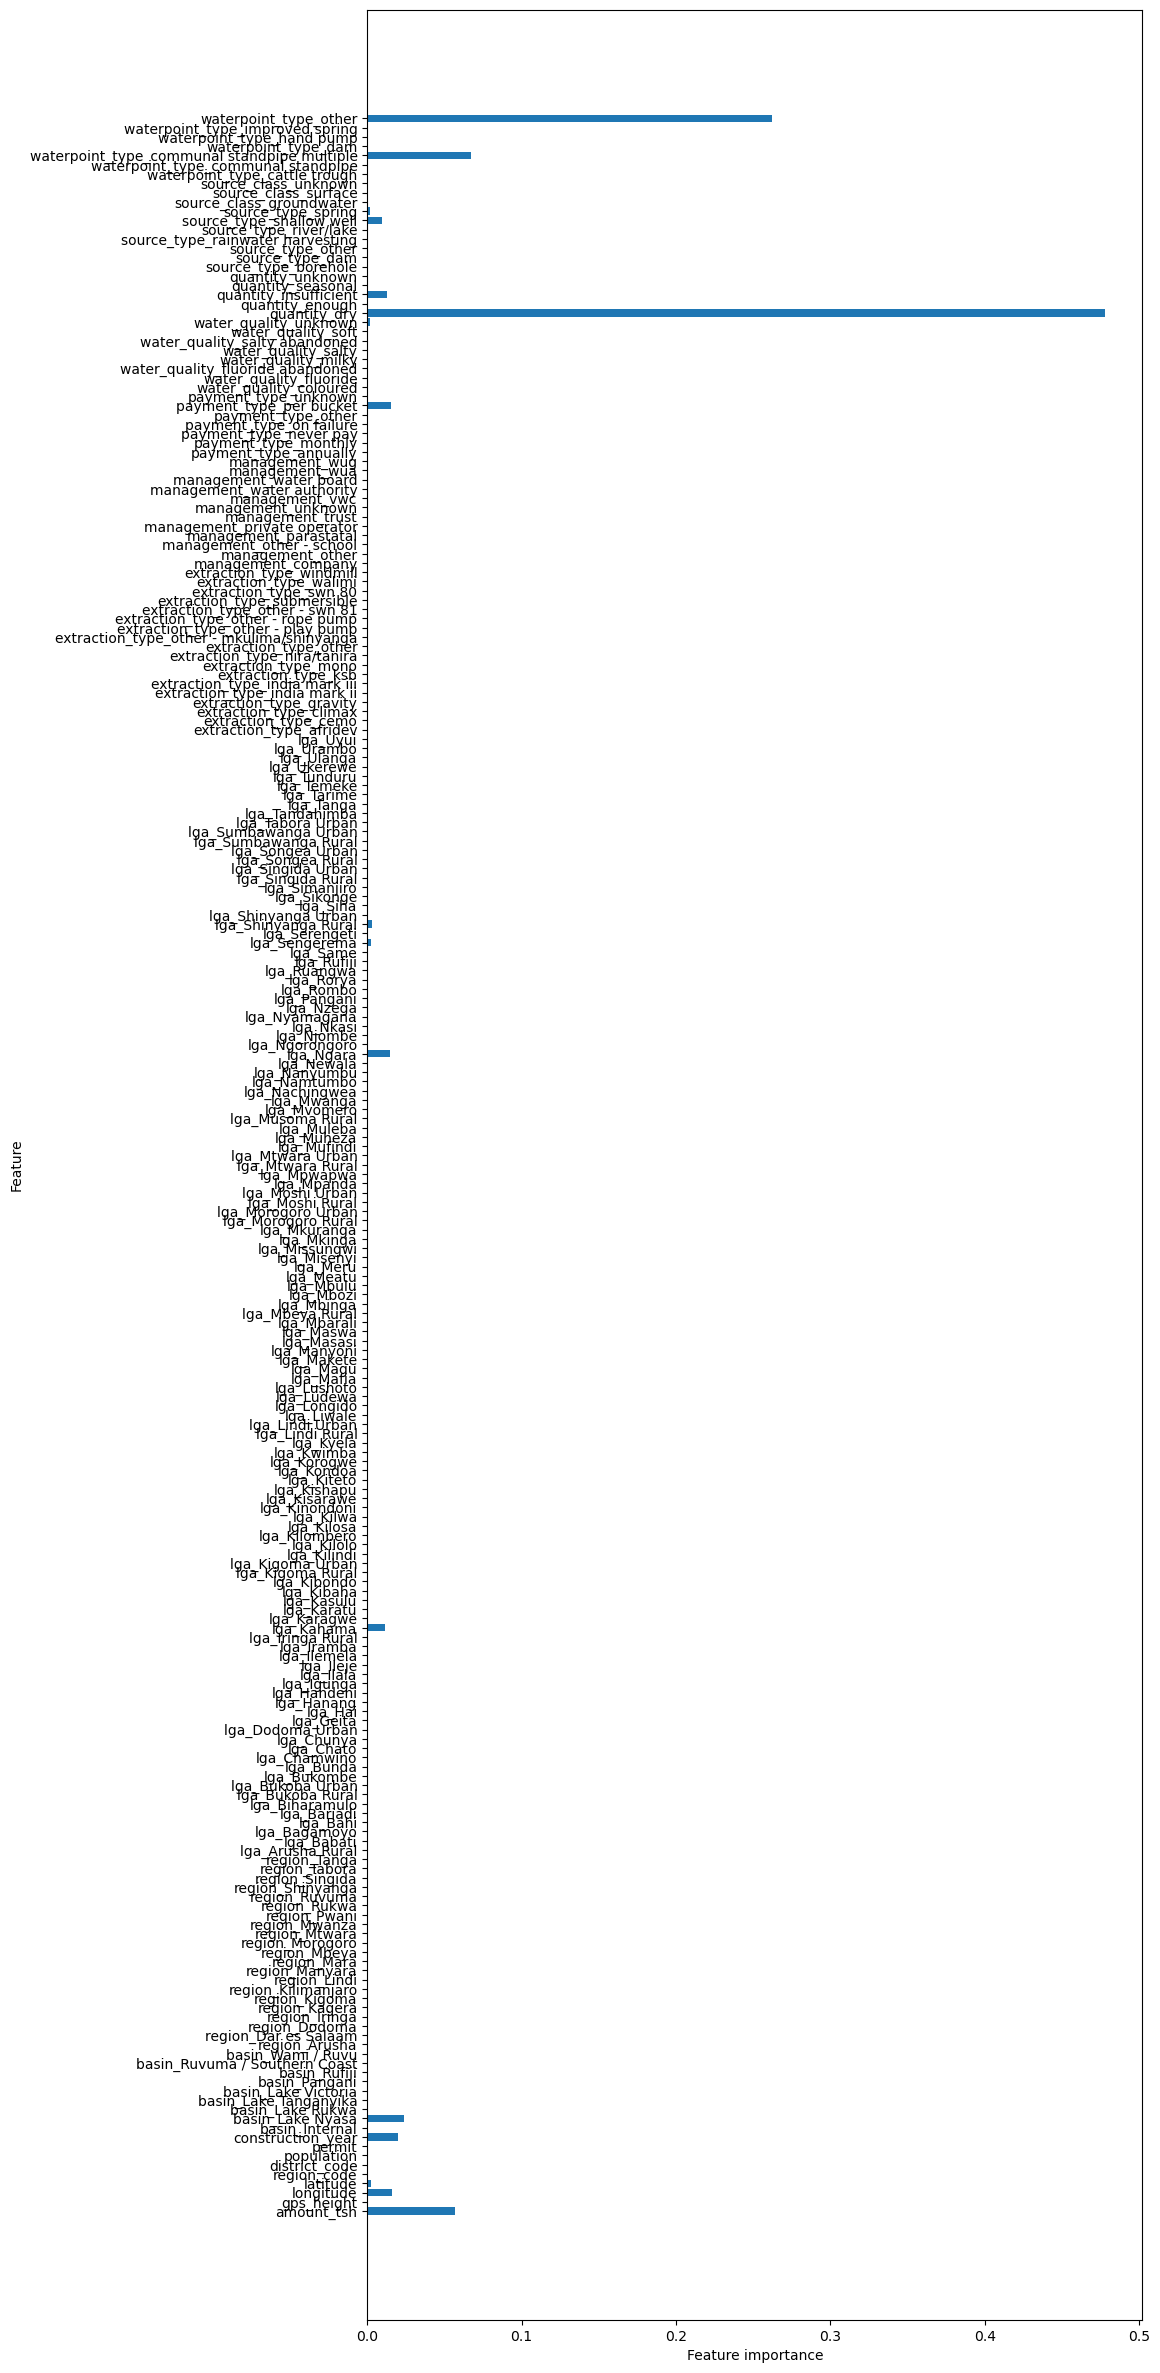

In [14]:
# Instantiate and fit a DecisionTreeClassifier with optimal parameters
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_impurity_decrease=0.0, 
                                  min_samples_split=5, random_state=1) 
tree_clf.fit(X_train, y_train)

plot_feature_importances(tree_clf)

In [15]:
myClassifiers = pd.Series(tree_clf.feature_importances_, index=X_train.columns)
myClassifiers.sort_values(ascending=False, inplace=True)
print(myClassifiers.head(20))

quantity_dry                                   0.478169
waterpoint_type_other                          0.262272
waterpoint_type_communal standpipe multiple    0.067309
amount_tsh                                     0.056559
basin_Lake Nyasa                               0.023574
construction_year                              0.020012
longitude                                      0.016070
payment_type_per bucket                        0.015602
lga_Ngara                                      0.014686
quantity_insufficient                          0.012817
lga_Kahama                                     0.011530
source_type_shallow well                       0.009308
lga_Shinyanga Rural                            0.002736
lga_Sengerema                                  0.002559
latitude                                       0.002351
source_type_spring                             0.001871
water_quality_unknown                          0.001607
extraction_type_nira/tanira                    0

In [16]:
y_pred = tree_clf.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)
print('The Decision Tree model with OHE has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Decision Tree model with OHE has an accuracy of 71.5 %


In [17]:
'quantity_dry', 'waterpoint_type_other', 'waterpoint_type_communal standpipe multiple', 'amount_tsh', 'basin_Lake Nyasa', 'construction_year', 'longitude', 'payment_type_per bucket', 'lga_Ngara', 'quantity_insufficient',

('quantity_dry',
 'waterpoint_type_other',
 'waterpoint_type_communal standpipe multiple',
 'amount_tsh',
 'basin_Lake Nyasa',
 'construction_year',
 'longitude',
 'payment_type_per bucket',
 'lga_Ngara',
 'quantity_insufficient')

In [18]:
#Using top 10 Feature Classifiers including Longitude
df10_long = data_onehot[['quantity_dry', 'waterpoint_type_other', 'waterpoint_type_communal standpipe multiple', 
                            'amount_tsh', 'basin_Lake Nyasa', 'construction_year', 'longitude', 
                            'payment_type_per bucket', 'lga_Ngara', 'quantity_insufficient','status_group']]

X = df10_long.drop('status_group', axis=1)
y = df10_long['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)

print('The Decision Tree model with OHE has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Decision Tree model with OHE has an accuracy of 71.2 %


In [19]:
#Using top 10 Feature Classifiers EXCLUDING Longitude
df10_no_long = data_onehot[['quantity_dry', 'waterpoint_type_other', 'waterpoint_type_communal standpipe multiple',
                               'amount_tsh', 'basin_Lake Nyasa', 'construction_year', 'payment_type_per bucket', 
                               'lga_Ngara', 'quantity_insufficient','lga_Kahama', 'status_group']]

X = df10_no_long.drop('status_group', axis=1)
y = df10_no_long['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)

print('The Decision Tree model with OHE has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Decision Tree model with OHE has an accuracy of 72.6 %


## Random Forest

#### Almost all columns in dataset

In [20]:
#Assign X and y
X = data_onehot.drop(['status_group'], axis=1)
y = data_onehot['status_group']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

#instantiate RandomForest
forest = RandomForestClassifier(random_state=1, max_depth=20, n_estimators=50)

#fit to training
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)
print('The Random Forest model with OHE has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Random Forest model with OHE has an accuracy of 81.5 %


In [21]:
#Random Forest accuracy score for training
forest.score(X_train, y_train)

0.8984593395968641

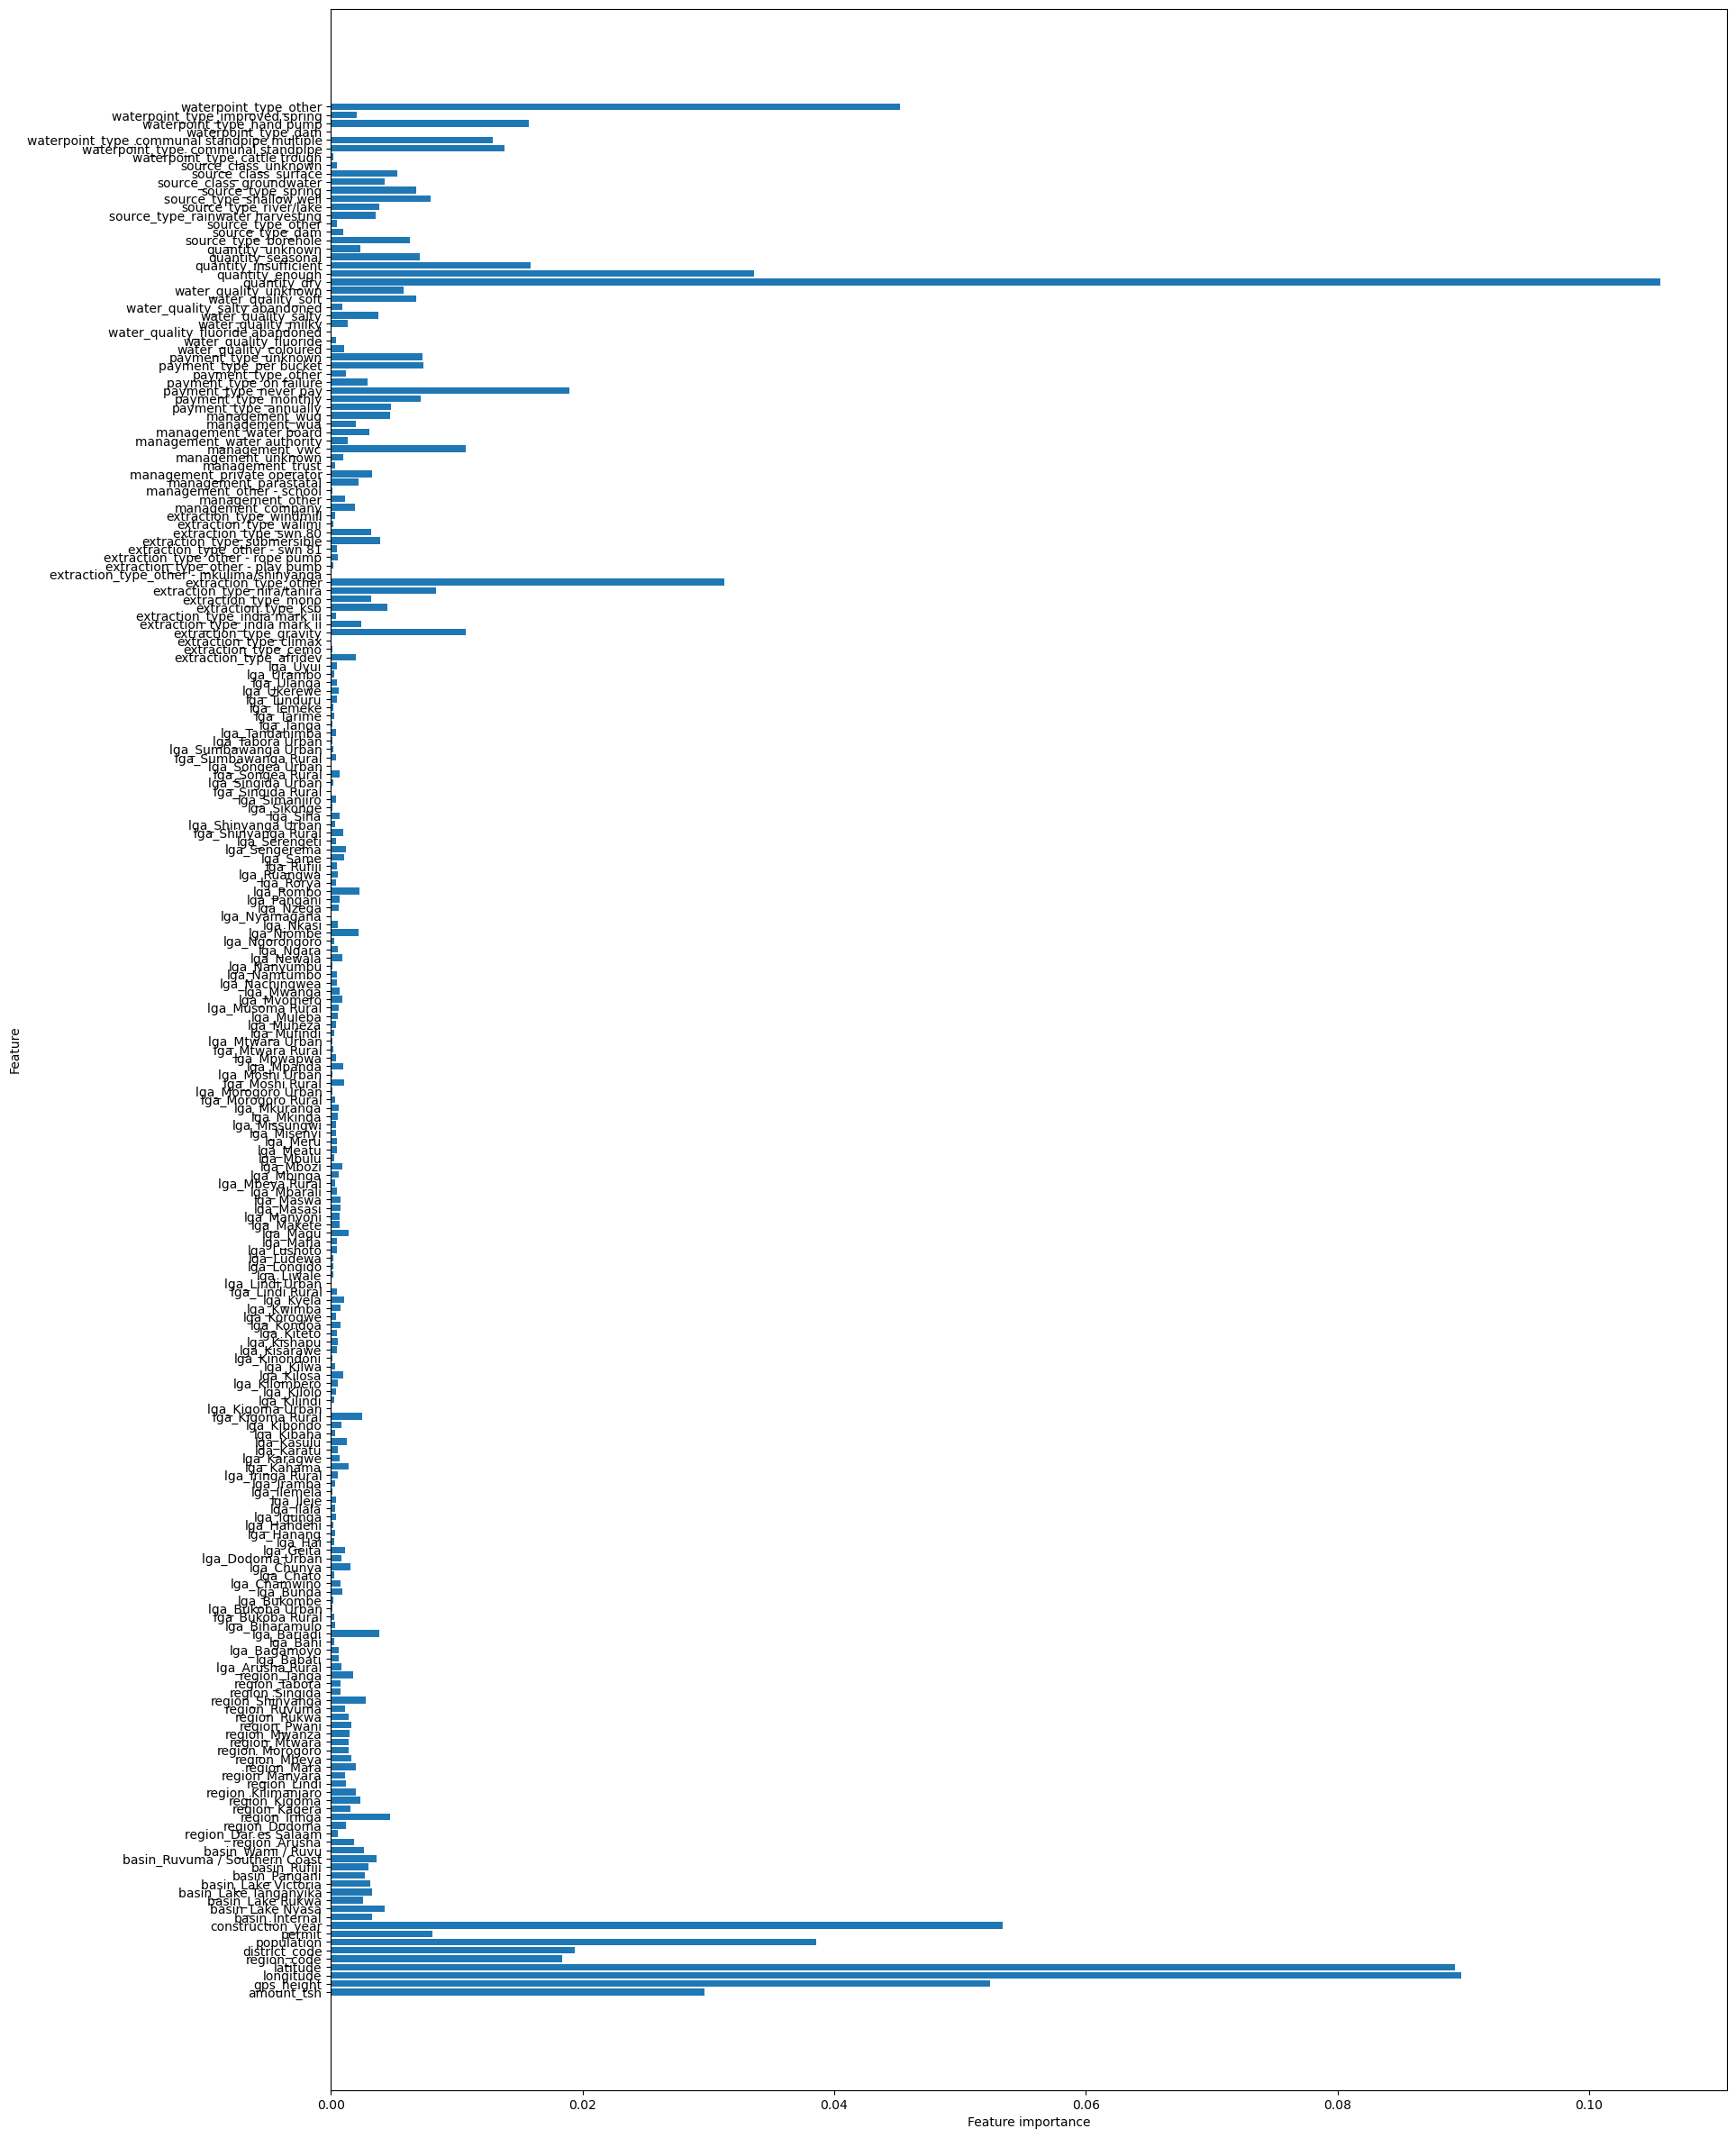

In [22]:
def plot_feature_importances(forest):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,30))
    plt.barh(range(n_features), forest.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(forest)

In [23]:
myClassifiers = pd.Series(forest.feature_importances_, index=X_train.columns)
myClassifiers.sort_values(ascending=False, inplace=True)
print(myClassifiers.head(22))
print(myClassifiers.head(11).values.sum())
print(myClassifiers.head(10).index.tolist())

quantity_dry                                   0.105688
longitude                                      0.089805
latitude                                       0.089326
construction_year                              0.053396
gps_height                                     0.052412
waterpoint_type_other                          0.045206
population                                     0.038559
quantity_enough                                0.033649
extraction_type_other                          0.031302
amount_tsh                                     0.029660
district_code                                  0.019354
payment_type_never pay                         0.018986
region_code                                    0.018403
quantity_insufficient                          0.015854
waterpoint_type_hand pump                      0.015728
waterpoint_type_communal standpipe             0.013779
waterpoint_type_communal standpipe multiple    0.012900
management_vwc                                 0

### Top 10 Classifiers

#### Includes Longitude/Latitude

In [24]:
#Using top 10 Feature Classifiers including Longitude/Latitude
df10_latlong = data_onehot[['quantity_dry', 'longitude', 'latitude', 'construction_year', 'gps_height', 
                            'waterpoint_type_other', 'population', 'quantity_enough', 'extraction_type_other', 
                            'amount_tsh', 'status_group']]

X = df10_latlong.drop('status_group', axis=1)
y = df10_latlong['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

forest = RandomForestClassifier(random_state=1, max_depth=20, n_estimators=50)

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)

print('The Random Forest model with OHE has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Random Forest model with OHE has an accuracy of 79.3 %


In [25]:
#Random Forest accuracy score for training
forest.score(X_train, y_train)

0.939823864472329

#### Excludes Longitude/Latitude

In [26]:
#Using top 10 Feature Classifiers EXCLUDING Longitude/Latitude
df10_no_latlong = data_onehot[['quantity_dry', 'construction_year', 'gps_height', 'waterpoint_type_other', 
                               'population', 'quantity_enough', 'extraction_type_other', 'amount_tsh', 
                               'district_code', 'payment_type_never pay', 'status_group']]

X = df10_no_latlong.drop('status_group', axis=1)
y = df10_no_latlong['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

forest = RandomForestClassifier(random_state=1, max_depth=20, n_estimators=50)

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)

print('The Random Forest model with OHE has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Random Forest model with OHE has an accuracy of 76.5 %


In [27]:
#Random Forest accuracy score for training
forest.score(X_train, y_train)

0.8740778107068542

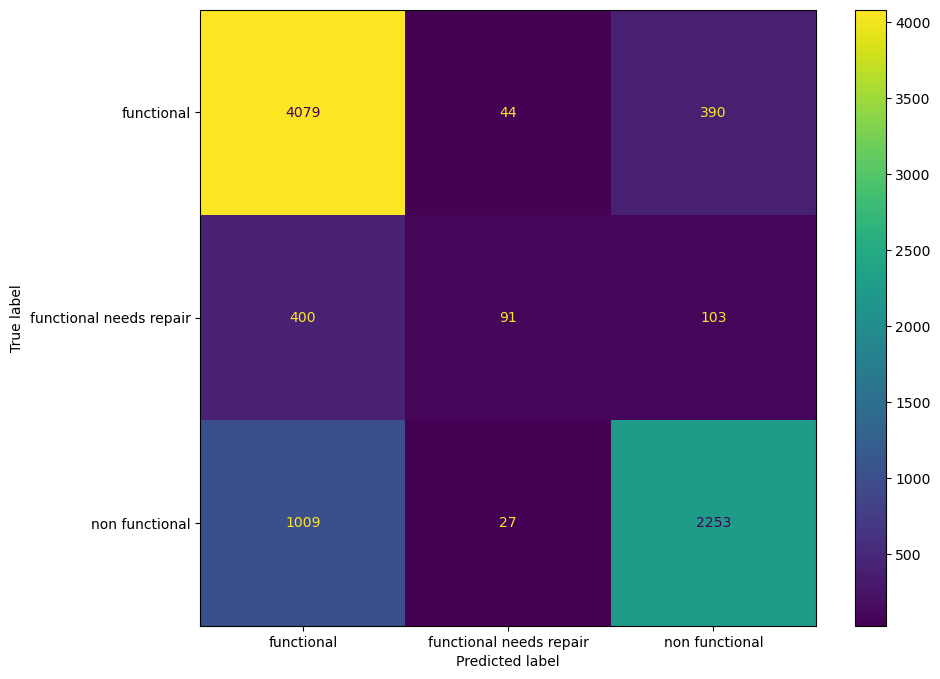

In [28]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=forest.classes_), display_labels=forest.classes_)
fig, ax = plt.subplots(figsize=(10,8))
cm_plot.plot(ax=ax)
plt.show()

### Top 20 Classifiers

#### Includes Longitude/Latitude

In [29]:
top20_df_withlatlong = data_onehot[['quantity_dry', 'longitude', 'latitude', 'construction_year', 'gps_height', 
                        'waterpoint_type_other', 'population', 'quantity_enough', 'extraction_type_other', 
                        'amount_tsh', 'district_code', 'payment_type_never pay', 'region_code', 
                        'quantity_insufficient', 'waterpoint_type_hand pump', 'waterpoint_type_communal standpipe', 
                        'waterpoint_type_communal standpipe multiple', 'management_vwc', 'extraction_type_gravity', 
                        'extraction_type_nira/tanira', 'status_group']] 

X = top20_df_withlatlong.drop('status_group', axis=1)
y = top20_df_withlatlong['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

forest = RandomForestClassifier(random_state=1, max_depth=15, n_estimators=50)

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)

print('The Random Forest model with OHE has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Random Forest model with OHE has an accuracy of 80.5 %


In [30]:
#Random Forest accuracy score for training
forest.score(X_train, y_train)

0.8671416861088341

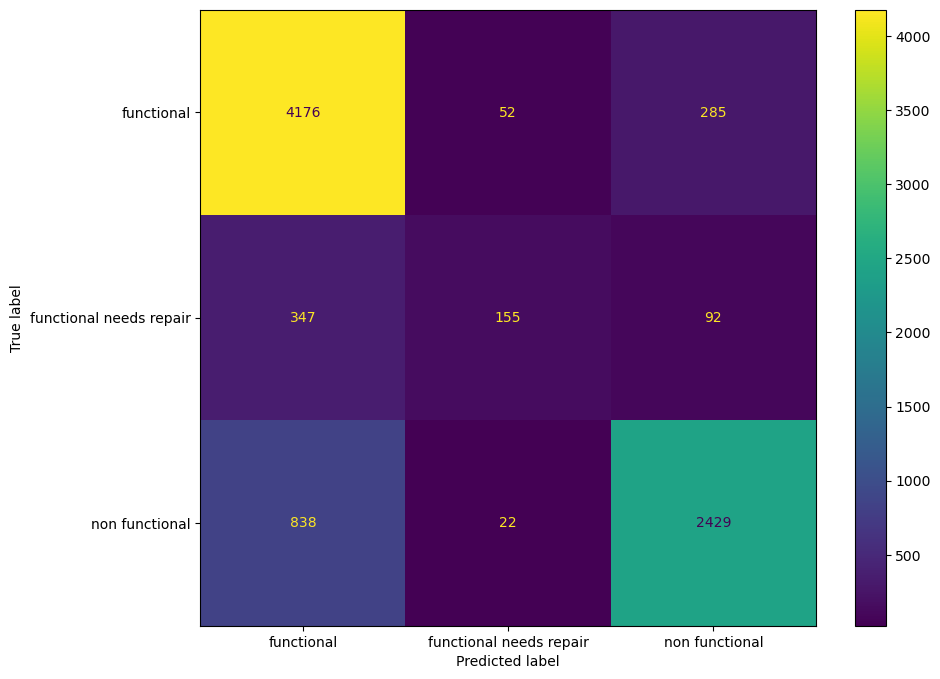

In [31]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=forest.classes_), display_labels=forest.classes_)
fig, ax = plt.subplots(figsize=(10,8))
cm_plot.plot(ax=ax)
plt.show()

#### Excludes Longitude/Latitude

In [32]:
top20_df_nolatlong = data_onehot[['quantity_dry','construction_year', 'gps_height','waterpoint_type_other', 'population', 
                        'quantity_enough', 'extraction_type_other', 'amount_tsh', 'district_code', 
                        'payment_type_never pay', 'region_code', 'quantity_insufficient', 'waterpoint_type_hand pump',
                        'waterpoint_type_communal standpipe', 'waterpoint_type_communal standpipe multiple', 
                        'management_vwc', 'extraction_type_gravity', 'extraction_type_nira/tanira', 
                        'permit','source_type_shallow well', 'status_group']] 

X = top20_df_nolatlong.drop('status_group', axis=1)
y = top20_df_nolatlong['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

forest = RandomForestClassifier(random_state=1, max_depth=15, n_estimators=50)

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)

print('The Random Forest model with OHE has a train accuracy of', round(forest.score(X_train, y_train), 3)*100, '%')
print('The Random Forest model with OHE has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Random Forest model with OHE has a train accuracy of 84.5 %
The Random Forest model with OHE has an accuracy of 79.4 %


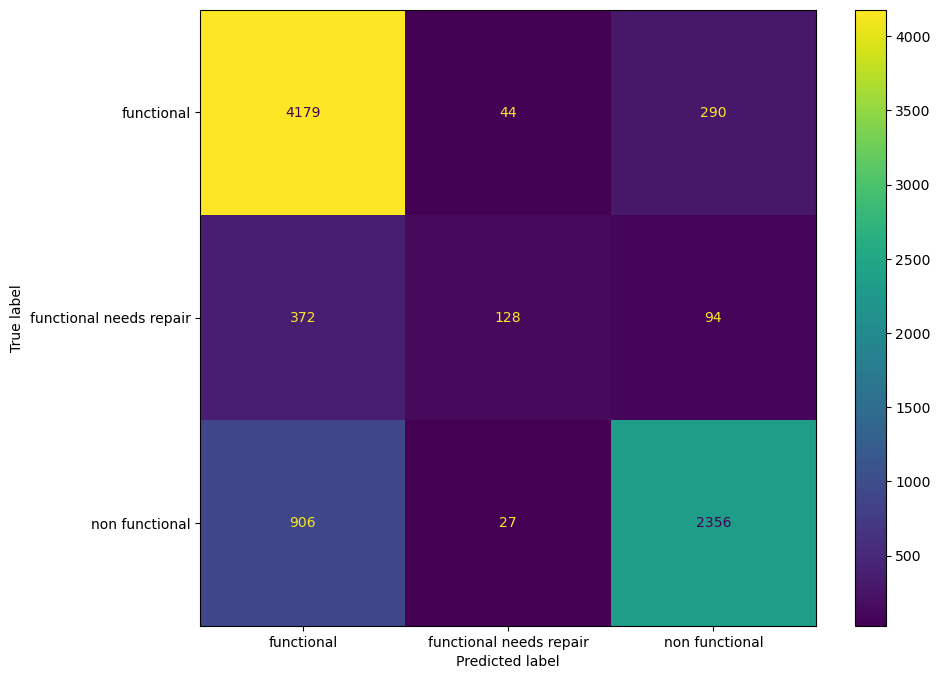

In [33]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=forest.classes_), display_labels=forest.classes_)
fig, ax = plt.subplots(figsize=(10,8))
cm_plot.plot(ax=ax)
plt.show()

# OVERSAMPLING AND UNDERSAMPLING 

### Undersampling

The Random Forest model with undersampling and OHE has a train accuracy of 88.5 %
The Random Forest model with undersampling and OHE has an accuracy of 69.5 %


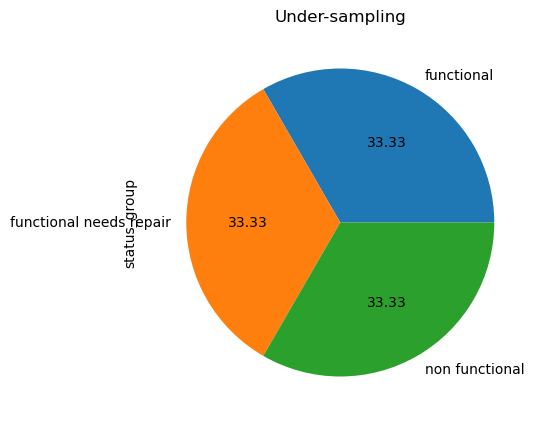

In [34]:
top20_df_nolatlong = data_onehot[['quantity_dry','construction_year', 'gps_height','waterpoint_type_other', 'population', 
                        'quantity_enough', 'extraction_type_other', 'amount_tsh', 'district_code', 
                        'payment_type_never pay', 'region_code', 'quantity_insufficient', 'waterpoint_type_hand pump',
                        'waterpoint_type_communal standpipe', 'waterpoint_type_communal standpipe multiple', 
                        'management_vwc', 'extraction_type_gravity', 'extraction_type_nira/tanira', 
                        'permit','source_type_shallow well', 'status_group']] 

X = top20_df_nolatlong.drop('status_group', axis=1)
y = top20_df_nolatlong['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

####################### UNDERSAMPLING ########################
sampling_strategy = "not minority"
autopct = "%.2f"

fig, axs = plt.subplots(ncols=1, figsize=(10, 5))
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=1)
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)
y_train_us.value_counts().plot.pie(autopct=autopct, ax=axs)
axs.set_title("Under-sampling")
##############################################################

forest = RandomForestClassifier(random_state=1, max_depth=15, n_estimators=50)

forest.fit(X_train_us, y_train_us)

y_pred = forest.predict(X_test)

acc_dt_dummies_us = accuracy_score(y_test, y_pred)

y_pred_train_us = forest.predict(X_train_us)
acc_dt_dummies_train_us = accuracy_score(y_train_us, y_pred_train_us)

print('The Random Forest model with undersampling and OHE has a train accuracy of', round(acc_dt_dummies_train_us, 3)*100, '%')
print('The Random Forest model with undersampling and OHE has an accuracy of', round(acc_dt_dummies_us, 3)*100, '%')

### Oversampling

The Random Forest model with oversampling and OHE has a train accuracy of 84.37 %
The Random Forest model with oversampling and OHE has an accuracy of 81.5 %


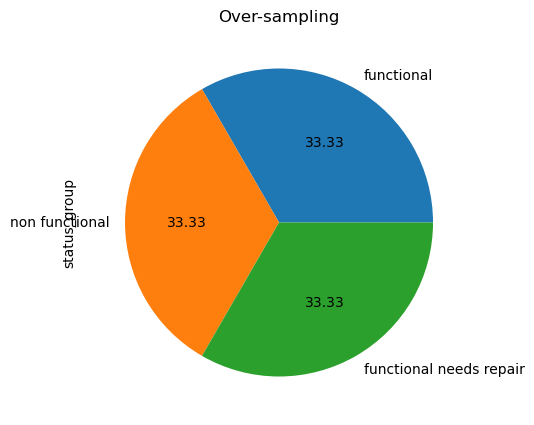

In [35]:
top20_df_nolatlong = data_onehot[['quantity_dry','construction_year', 'gps_height','waterpoint_type_other', 'population', 
                        'quantity_enough', 'extraction_type_other', 'amount_tsh', 'district_code', 
                        'payment_type_never pay', 'region_code', 'quantity_insufficient', 'waterpoint_type_hand pump',
                        'waterpoint_type_communal standpipe', 'waterpoint_type_communal standpipe multiple', 
                        'management_vwc', 'extraction_type_gravity', 'extraction_type_nira/tanira', 
                        'permit','source_type_shallow well', 'status_group']] 

X = top20_df_nolatlong.drop('status_group', axis=1)
y = top20_df_nolatlong['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

####################### UNDERSAMPLING ########################
sampling_strategy = "not minority"
autopct = "%.2f"

fig, axs = plt.subplots(ncols=1, figsize=(10, 5))
sampling_strategy = "not majority"
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=1)
X_train_os, y_train_os = ros.fit_resample(X, y)
y_train_os.value_counts().plot.pie(autopct=autopct, ax=axs)
axs.set_title("Over-sampling")
##############################################################

forest = RandomForestClassifier(random_state=1, max_depth=15, n_estimators=50)

forest.fit(X_train_os, y_train_os)

y_pred = forest.predict(X_test)

acc_dt_dummies_os = accuracy_score(y_test, y_pred)

y_pred_train_os = forest.predict(X_train_os)
acc_dt_dummies_train_os = accuracy_score(y_train_os, y_pred_train_os)
print('The Random Forest model with oversampling and OHE has a train accuracy of', round(acc_dt_dummies_train_os, 4)*100, '%')
print('The Random Forest model with oversampling and OHE has an accuracy of', round(acc_dt_dummies_os, 3)*100, '%')

## NOW OVERSAMPLING INCLUDING GPS COORDINATES

The Random Forest model with oversampling and OHE has a train accuracy of 87.2 %
The Random Forest model with oversampling and OHE has an accuracy of 84.3 %


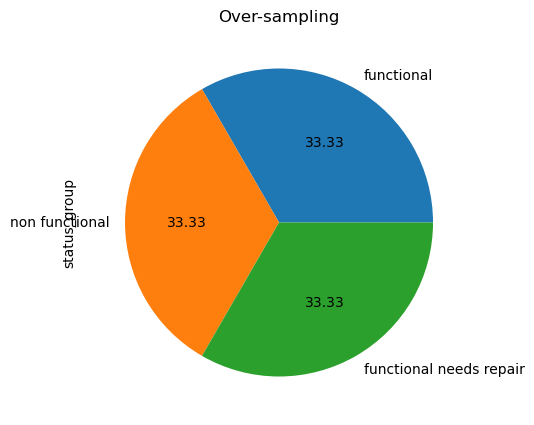

In [36]:
top20_df_nolatlong = data_onehot[['quantity_dry', 'longitude', 'latitude', 'construction_year', 'gps_height', 
                                  'waterpoint_type_other', 'population', 
                        'quantity_enough', 'extraction_type_other', 'amount_tsh', 'district_code', 
                        'payment_type_never pay', 'region_code', 'quantity_insufficient', 'waterpoint_type_hand pump',
                        'waterpoint_type_communal standpipe', 'waterpoint_type_communal standpipe multiple', 
                        'management_vwc', 'extraction_type_gravity', 'extraction_type_nira/tanira', 
                        'permit','source_type_shallow well', 'status_group']] 

X = top20_df_nolatlong.drop('status_group', axis=1)
y = top20_df_nolatlong['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

####################### UNDERSAMPLING ########################
sampling_strategy = "not minority"
autopct = "%.2f"

fig, axs = plt.subplots(ncols=1, figsize=(10, 5))
sampling_strategy = "not majority"
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=1)
X_train_os, y_train_os = ros.fit_resample(X, y)
y_train_os.value_counts().plot.pie(autopct=autopct, ax=axs)
axs.set_title("Over-sampling")
##############################################################

forest = RandomForestClassifier(random_state=1, max_depth=15, n_estimators=50)

forest.fit(X_train_os, y_train_os)

y_pred = forest.predict(X_test)

acc_dt_dummies_os = accuracy_score(y_test, y_pred)

y_pred_train_os = forest.predict(X_train_os)
acc_dt_dummies_train_os = accuracy_score(y_train_os, y_pred_train_os)
print('The Random Forest model with oversampling and OHE has a train accuracy of', round(acc_dt_dummies_train_os, 4)*100, '%')
print('The Random Forest model with oversampling and OHE has an accuracy of', round(acc_dt_dummies_os, 3)*100, '%')

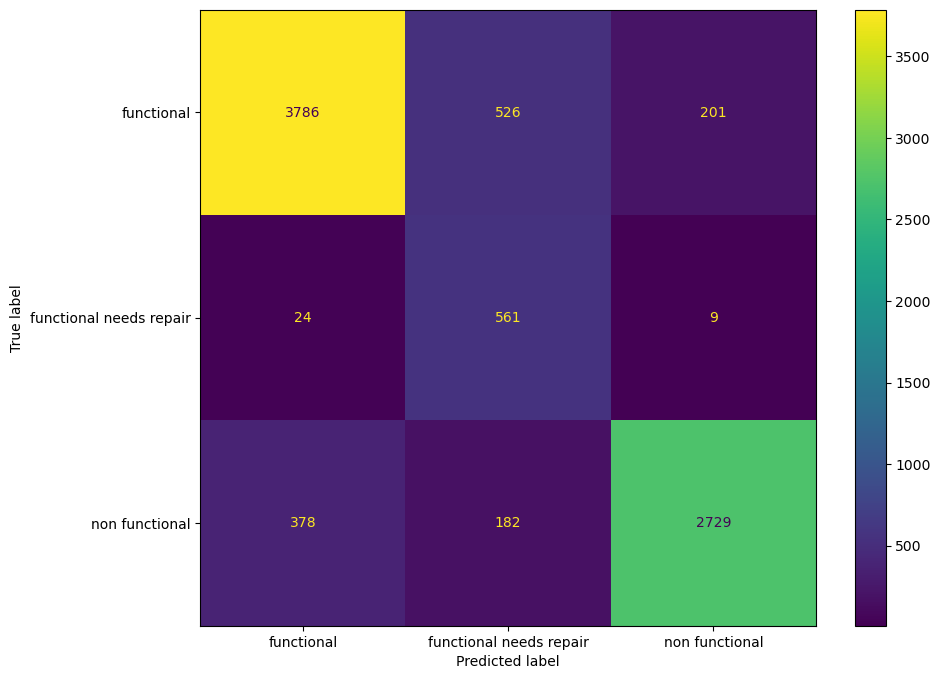

array([0.83890982, 0.94444444, 0.82973548])

In [37]:
matrix = confusion_matrix(y_test, y_pred, labels=forest.classes_)

cm_plot = ConfusionMatrixDisplay(matrix, display_labels=forest.classes_)
fig, ax = plt.subplots(figsize=(10,8))
cm_plot.plot(ax=ax)
plt.show()


matrix.diagonal()/matrix.sum(axis=1)

# MAKING A SUBMISSION

Predicting on the test data and creating the csv file

#### Submission OHE

In [38]:
#What are the categorical columns
categorical = ['basin', 'region', 'lga', 'extraction_type', 
               'management', 'payment_type', 'water_quality', 'quantity', 'source_type', 'source_class', 
               'waterpoint_type']

#What are the continous columns
continuous = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'population', 
              'permit', 'construction_year']


submit_cat_df = test_vals[categorical]
submit_cont_df = test_vals[continuous]

#instantiate OHE
submit_ohe = OneHotEncoder()

#fit_transform
submit_X_cat = submit_ohe.fit_transform(submit_cat_df).toarray()

submit_X_cat = pd.DataFrame(submit_X_cat, columns = submit_ohe.get_feature_names_out(categorical))

#Reset the indexes 
submit_X_cat = submit_X_cat.reset_index(drop=True)
submit_cont_df = submit_cont_df.reset_index(drop=True)

#combine the OHE categorical and continuous data back into one dataset
submit_data_onehot = pd.concat([submit_cont_df,submit_X_cat], axis=1, ignore_index=True)

submit_data_onehot.columns =list(submit_cont_df.columns) + list(submit_X_cat.columns)

In [39]:
submit_data_onehot['permit'].fillna(True, inplace=True)  # Filling missing permit data with True (do false next time)

test_vals_submit = submit_data_onehot[['quantity_dry','longitude', 'latitude', 'construction_year', 'gps_height',
                                       'waterpoint_type_other', 
                                       'population', 'quantity_enough', 'extraction_type_other', 'amount_tsh', 
                                       'district_code', 'payment_type_never pay', 'region_code', 
                                       'quantity_insufficient', 'waterpoint_type_hand pump', 
                                       'waterpoint_type_communal standpipe', 
                                       'waterpoint_type_communal standpipe multiple', 'management_vwc', 
                                       'extraction_type_gravity', 'extraction_type_nira/tanira', 'permit', 
                                       'source_type_shallow well']] 

y_pred_submit = forest.predict(test_vals_submit[['quantity_dry', 'longitude', 'latitude', 'construction_year', 
                                                 'gps_height',
                                               'waterpoint_type_other', 'population', 'quantity_enough',
                                               'extraction_type_other', 'amount_tsh', 'district_code',
                                               'payment_type_never pay', 'region_code', 'quantity_insufficient',
                                               'waterpoint_type_hand pump', 'waterpoint_type_communal standpipe',
                                               'waterpoint_type_communal standpipe multiple', 'management_vwc',
                                               'extraction_type_gravity', 'extraction_type_nira/tanira', 'permit',
                                               'source_type_shallow well']])

In [40]:
# submission2_df = pd.concat([test_vals['id'].reset_index(drop=True), 
#                             pd.Series(y_pred_submit).reset_index(drop=True)], 
#                            axis=1).rename(columns={0:'status_group'})
# submission2_df.rename(columns={0:'status_group'})

### Creating submission csv files

In [41]:
# sub_name = 'ohe_oversample_random_forest'
# submission2_df.to_csv('submissions/submission' + sub_name + '.csv', index=False)  